In [1]:
import pandas as pd
import numpy as np 

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.1f}'.format)

df = pd.read_excel('HIST_PAINEL_COVIDBR.xlsx')

In [2]:
a = df[['estado', 'municipio', 'data']].groupby(['estado', 'municipio']).agg(np.count_nonzero)

In [3]:
b = df[df.municipio.notna()][['municipio', 'data']].groupby(['data']).agg(np.count_nonzero)

In [4]:
df2 = pd.DataFrame(columns=b.index, index = a.index)

In [5]:
for uf_mun in df2.index:
    c = df[(df.estado == uf_mun[0]) & (df.municipio == uf_mun[1])][['data', 'obitosAcumulado']].set_index('data')
    for data in c.index:
        df2.at[(uf_mun[0], uf_mun[1]), data] = c.loc[data].obitosAcumulado

In [6]:
tam = len(df2.columns)
df3 = df2.iloc[:,1:tam]
df3.columns = list(range(0,tam-1))
df4 = df2.iloc[:,0:tam-1]
df4.columns = list(range(0,tam-1))
df5 = df3 - df4
df5.columns = df2.columns[1:]

In [7]:
df5 = df5.fillna(0)
df6 = pd.DataFrame(columns=df5.columns, index=df5.index)
for x in df5.index:
    for c in range(0,tam):
        if c >= 7:
            df6.at[x, df2.columns[c]] = df5.loc[x][c-7:c].mean()
df6 = df6.fillna(0)

In [8]:
q_pico = []
d_pico = []
for x in df6.index:
    # print(df6.loc[x])
    q_pico.append(df6.loc[x].max())
    d_pico.append(df6.columns[df6.loc[x].argmax()])

In [9]:
# df6.loc[('AC', 'Acrelândia')]
# df6 = df6.fillna(0)

In [10]:
df7 = pd.DataFrame(df6.iloc[:,-1], index=df6.index)
df7['Q_Pico'] = pd.Series(q_pico, index=df6.index)
df7['D_Pico'] = pd.Series(d_pico, index=df6.index)
df7.columns = ['Ult_7_Dias', 'Pico', 'Dia_do_Pico']
df7['Delta %'] = df7['Ult_7_Dias'] / df7['Pico'] - 1
df7 = df7.sort_values('Ult_7_Dias', ascending=False)
df7.head(10)

,,Ult_7_Dias,Pico,Dia_do_Pico,Delta %
estado,municipio,,,,
RJ,Rio de Janeiro,112.6,112.6,2020-05-18,0.0
SP,São Paulo,81.9,94.4,2020-04-29,-0.1
CE,Fortaleza,51.4,53.0,2020-05-13,-0.0
PA,Belém,44.1,51.0,2020-05-14,-0.1
AM,Manaus,37.1,41.7,2020-05-09,-0.1
PE,Recife,31.4,31.4,2020-05-18,0.0
MA,São Luís,14.1,15.9,2020-05-12,-0.1
BA,Salvador,13.0,13.0,2020-05-18,0.0
PE,Jaboatão dos Guararapes,9.1,9.1,2020-05-18,0.0


### Número de óbtidos por COVID-19
    Ranking 10 maiores cidades brasileiras - considerando últ 7 dias
    Valores apresentam média diária de óbitos em 7 dias
    Atualizado com dados até 16/05/2020
    Data no formato aaaa-mm-dd
    Fonte: Secretarias Estaduais de Saúde. Brasil.
    https://covid.saude.gov.br/

In [11]:
lista_interesse = [('MG', 'Uberlândia'), ('SP', 'Americana'), ('MG', 'Patos de Minas'), ('DF', 'Brasília'), ('MG', 'Patrocínio'), ('SP', 'Carapicuíba')]
df7.loc[lista_interesse].sort_values('Ult_7_Dias', ascending=False)

Ult_7_Dias  Pico Dia_do_Pico  Delta %
estado municipio                                            
DF     Brasília               3.1   3.1  2020-05-18      0.0
SP     Carapicuíba            2.6   2.6  2020-05-16      0.0
MG     Uberlândia             0.3   0.4  2020-04-26     -0.3
SP     Americana              0.0   0.3  2020-04-05     -1.0
MG     Patos de Minas         0.0   0.1  2020-04-10     -1.0
       Patrocínio             0.0   0.1  2020-04-14     -1.0

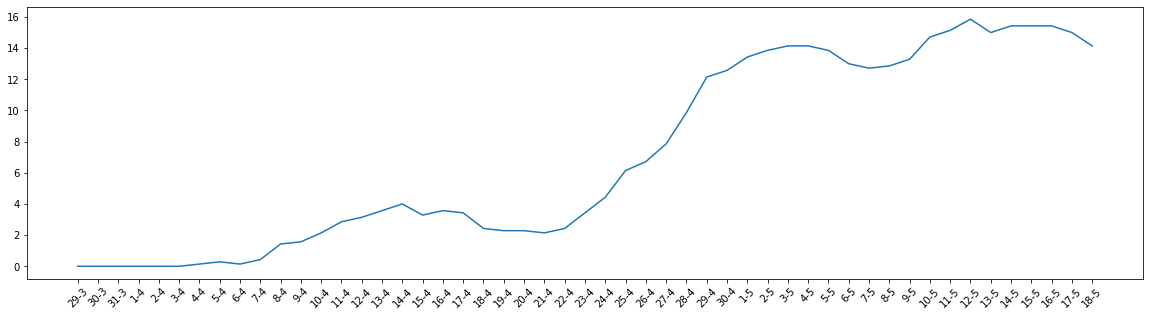

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
df_plt = df6.loc['MA', 'São Luís']
# dates = pd.date_range('29-03-2020', periods=len(df_plt))

dates = []
for x in df_plt.index:
    dates.append(str(x.day) + '-' + str(x.month))
df_plt.index = dates
plt.plot(df_plt)
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [40]:
str(df6.loc['RJ', 'Rio de Janeiro'].index[0].day) + '-' + str(df6.loc['RJ', 'Rio de Janeiro'].index[0].month)

'29-3'

In [51]:
df[df.municipio == 'Rio de Janeiro'].tail(20)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
52537,Sudeste,RJ,Rio de Janeiro,33,330455.0,33005.0,Metropolitana I,2020-04-29,18,6718903.0,5689,496,nan,nan
52538,Sudeste,RJ,Rio de Janeiro,33,330455.0,33005.0,Metropolitana I,2020-04-30,18,6718903.0,5903,535,nan,nan
52539,Sudeste,RJ,Rio de Janeiro,33,330455.0,33005.0,Metropolitana I,2020-05-01,18,6718903.0,6189,574,nan,nan
52540,Sudeste,RJ,Rio de Janeiro,33,330455.0,33005.0,Metropolitana I,2020-05-02,18,6718903.0,6448,603,nan,nan
52541,Sudeste,RJ,Rio de Janeiro,33,330455.0,33005.0,Metropolitana I,2020-05-03,19,6718903.0,6750,631,nan,nan
52542,Sudeste,RJ,Rio de Janeiro,33,330455.0,33005.0,Metropolitana I,2020-05-04,19,6718903.0,7283,670,nan,nan
52543,Sudeste,RJ,Rio de Janeiro,33,330455.0,33005.0,Metropolitana I,2020-05-05,19,6718903.0,7832,713,nan,nan
52544,Sudeste,RJ,Rio de Janeiro,33,330455.0,33005.0,Metropolitana I,2020-05-06,19,6718903.0,8577,764,nan,nan
52545,Sudeste,RJ,Rio de Janeiro,33,330455.0,33005.0,Metropolitana I,2020-05-07,19,6718903.0,9051,919,nan,nan
52546,Sudeste,RJ,Rio de Janeiro,33,330455.0,33005.0,Metropolitana I,2020-05-08,19,6718903.0,9672,1002,nan,nan
